<a href="https://colab.research.google.com/github/mvakhmenin/MindSet/blob/main/Mind_set_%D0%B4%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D1%8F%D0%B4%D0%B0_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B0_(%2B_%D0%BC%D0%B0%D1%81%D1%88%D1%82%D0%B0%D0%B1%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_plotly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Варианты расчета доверительного интервала временного ряда

Сокращенный вариант - только доверительный вариант бутстрепом и доверительный интервал прогноза
https://colab.research.google.com/drive/1Qv4hkWnbjH0bSF7qd0ZcU5ogLdCxGmoe

# Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go

import scipy.stats as sps

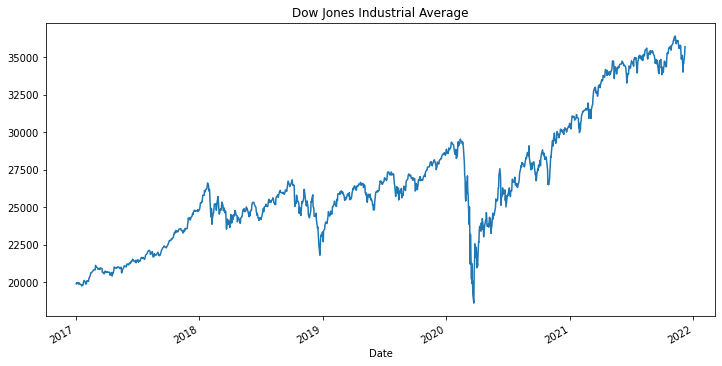

In [2]:
df_dj = pd.read_csv('https://github.com/mvakhmenin/datasets/raw/main/DowJonesIndustrialAverage.csv')
df_dj = df_dj[['Date', ' Close']]
df_dj.columns = ['Date', 'Dow Jones Industrial Average']
df_dj.Date = pd.to_datetime(df_dj.Date, format='%m/%d/%y')
df_dj.set_index('Date', inplace=True)
df_dj.sort_index(inplace=True)
df_dj.plot(title='Dow Jones Industrial Average', figsize=(12,6), legend=False)
None

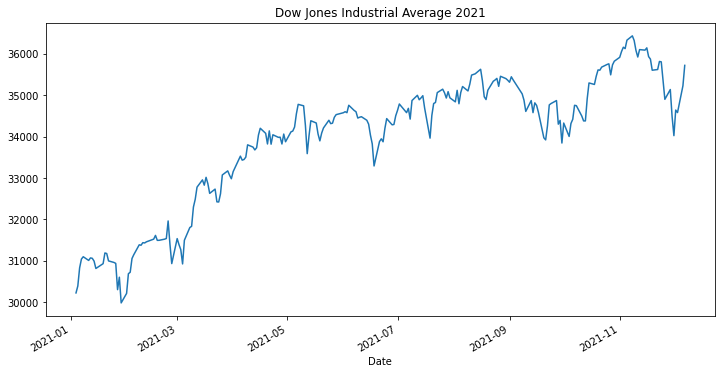

In [3]:
df_dj_2021 = df_dj.loc['2021']
df_dj_2021.plot(title='Dow Jones Industrial Average 2021', figsize=(12,6), legend=False)
None

In [4]:
def plot_ci(df, ts_name, title='', resample=True):
  '''
  Вспомогательная функция для построения графика с доверительным интервалом.
  df - pandas DataFrame c временным рядом и доверительным интервалом. Индекс - дневная гранулярность.
  ts_name - название столбца с временным рядом.
  title - заголовок графика.
  resample - определяет, нужно ли сглаживать данные с дневных на недельные
  Столбцы с доверительным интервалом в датафрейме должны называться 'ci_lower' и 'ci_upper'
  '''
  plt.figure(figsize=(12,6))
  plt.title(title)

  if resample: # сглаживаем временной ряд, если параметр resample установлен в True
    plt.plot(df[ts_name].resample('W').mean().index, 
             df[ts_name].resample('W').mean(), 
             c='r'
             )
  else:
    plt.plot(df.index, df[ts_name], c='r')

  if resample: # сглаживаем доверительный интервал, если параметр resample установлен в True
    plt.fill_between(df.resample('W').mean().index, 
                         df['ci_lower'].resample('W').mean(), 
                         df['ci_upper'].resample('W').mean(), 
                         color='blue', 
                         alpha=.25
                         )
  else:
    plt.fill_between(df.index, df['ci_lower'], df['ci_upper'], color='blue', alpha=.25)

  plt.show()

# Доверительный интервал временного ряда через скользящее среднее

теория: https://stackoverflow.com/questions/55399807/averaging-several-time-series-together-with-confidence-interval-with-test-code?rq=1

In [5]:
df_dj_2021['mean'] = df_dj_2021['Dow Jones Industrial Average'].rolling(7, center=True).mean() # окно шириной 7 дней, чтобы перейти от дневных данных к недельным
df_dj_2021['std'] = df_dj_2021['Dow Jones Industrial Average'].rolling(7, center=True).std()
df_dj_2021['ci_lower'] = df_dj_2021['mean'] - 2 * df_dj_2021['std']
df_dj_2021['ci_upper'] = df_dj_2021['mean'] + 2 * df_dj_2021['std']
df_dj_2021.dropna(inplace=True)
df_dj_2021

,Dow Jones Industrial Average,mean,std,ci_lower,ci_upper
Date,,,,,
2021-01-07,31041.13,30808.767143,356.299322,30096.168498,31521.365788
2021-01-08,31097.97,30928.278571,252.648447,30422.981677,31433.575466
2021-01-11,31008.69,31013.981429,89.020746,30835.939937,31192.022920
2021-01-12,31068.69,31011.818571,94.281280,30823.256012,31200.381131
2021-01-13,31060.47,30996.017143,97.755017,30800.507108,31191.527177
...,...,...,...,...,...
2021-11-26,34899.34,35111.210000,690.139775,33730.930449,36491.489551
2021-11-29,35135.94,34971.287143,668.934575,33633.417994,36309.156292
2021-11-30,34483.72,34795.041429,564.301640,33666.438150,35923.644708


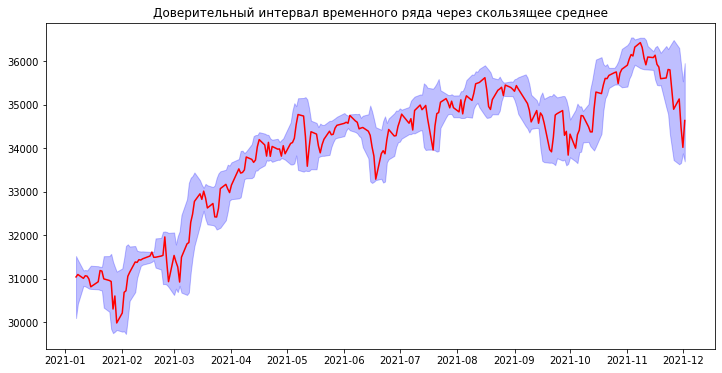

In [6]:
plot_ci(df_dj_2021, 'Dow Jones Industrial Average',
        title='Доверительный интервал временного ряда через скользящее среднее',
        resample=False
        )

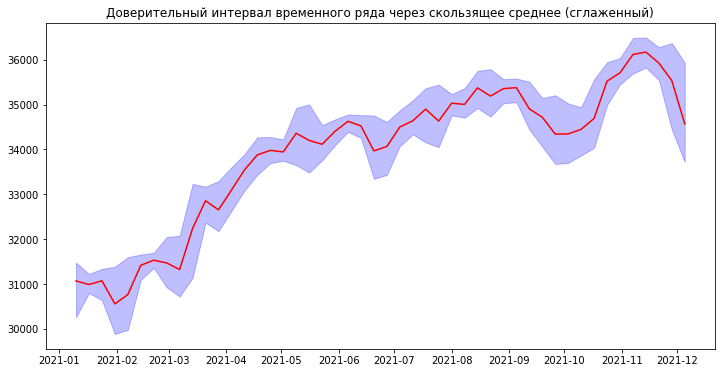

In [7]:
plot_ci(df_dj_2021, 'Dow Jones Industrial Average',
        title='Доверительный интервал временного ряда через скользящее среднее (сглаженный)'
        )

Возникает проблема подбора ширины скользящего окна, от которого будет зависить конфигурация доверительного интервала

# Доверительный интервал через изменение грануляции данных (группировку)

теория: https://stackoverflow.com/questions/56203420/how-to-use-custom-error-bar-in-seaborn-lineplot

Не понятно, как задать требуемый уровень значимости

Меняем грануляцию с дневную на недельную

In [8]:
df_mean = df_dj_2021['Dow Jones Industrial Average'].resample('W').mean()
df_std = df_dj_2021['Dow Jones Industrial Average'].resample('W').std()
ci_upper = df_mean + 2 * df_std
ci_lower = df_mean - 2 * df_std

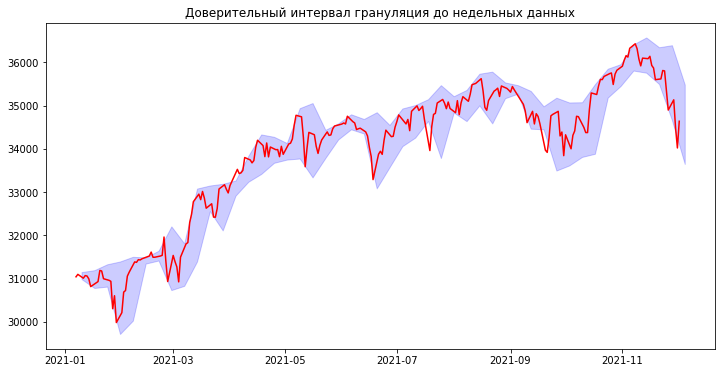

In [9]:
plt.figure(figsize=(12,6))
plt.title('Доверительный интервал грануляция до недельных данных')
plt.plot(df_dj_2021.index, df_dj_2021['Dow Jones Industrial Average'], c='r')
plt.fill_between(df_mean.index, ci_lower, ci_upper, color='blue', alpha=.2)
plt.show()

Меняем грануляцию с дневную на месячную

In [10]:
df_mean = df_dj_2021['Dow Jones Industrial Average'].resample('M').mean()
df_std = df_dj_2021['Dow Jones Industrial Average'].resample('M').std()
ci_upper = df_mean + 2 * df_std
ci_lower = df_mean - 2 * df_std

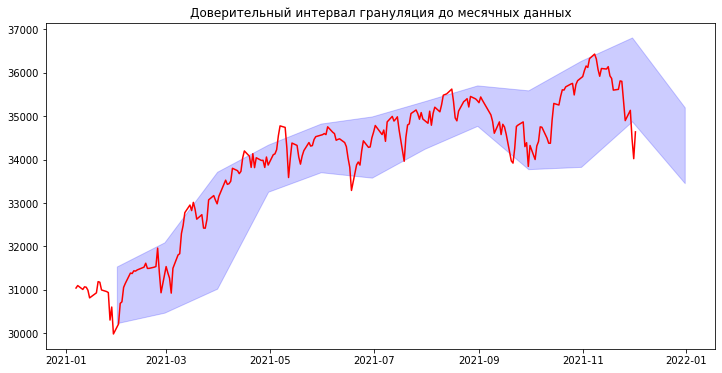

In [11]:
plt.figure(figsize=(12,6))
plt.title('Доверительный интервал грануляция до месячных данных')
plt.plot(df_dj_2021.index, df_dj_2021['Dow Jones Industrial Average'], c='r')
plt.fill_between(df_mean.index, ci_lower, ci_upper, color='blue', alpha=.2)
plt.show()

# Доверительный интервал через bootstrap

In [12]:
df_dj_2021 = df_dj_2021[['Dow Jones Industrial Average']]
df_dj_2021

,Dow Jones Industrial Average
Date,
2021-01-07,31041.13
2021-01-08,31097.97
2021-01-11,31008.69
2021-01-12,31068.69
2021-01-13,31060.47
...,...
2021-11-26,34899.34
2021-11-29,35135.94
2021-11-30,34483.72


Переведем грануляцию с дневной на недельную, сгруппировав значения по номеру недели. В результате у нас будет несколько значений для каждой точки, чтобы выполнить bootstrap

In [13]:
df_dj_2021.loc[:,'week_no'] = df_dj_2021.index.isocalendar().week
df_dj_2021

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Dow Jones Industrial Average,week_no
Date,,
2021-01-07,31041.13,1
2021-01-08,31097.97,1
2021-01-11,31008.69,2
2021-01-12,31068.69,2
2021-01-13,31060.47,2
...,...,...
2021-11-26,34899.34,47
2021-11-29,35135.94,48
2021-11-30,34483.72,48


In [14]:
grouped = df_dj_2021.groupby('week_no')['Dow Jones Industrial Average'].apply(list)
grouped = pd.DataFrame(grouped)
grouped

,Dow Jones Industrial Average
week_no,
1,"[31041.13, 31097.97]"
2,"[31008.69, 31068.69, 31060.47, 30991.52, 30814..."
3,"[30930.52, 31188.38, 31176.01, 30996.98]"
4,"[30960.0, 30937.04, 30303.17, 30603.36, 29982.62]"
5,"[30211.91, 30687.48, 30723.6, 31055.86, 31148.24]"
6,"[31385.76, 31375.83, 31437.8, 31430.7, 31458.4]"
7,"[31522.75, 31613.02, 31493.34, 31494.32]"
8,"[31521.69, 31537.35, 31961.86, 31402.01, 30932..."
9,"[31535.51, 31391.52, 31270.09, 30924.14, 31496.3]"


Получим средние 100 выборок из двух трех. Параметры бутстрепа выбраны наугад.

In [15]:
def make_bootstrap(x, n_boot, sample_size):
  '''
  Вспомогательная фнукция, которая возвращает выборку bootstrapa с параметрами
  n_boot - количество получаемых средних из исходной выборки
  sample_size - количество усредняемых значений исходной выборки
  '''
  sample_mean = [] 
  for _ in range(n_boot):
     sample_n = np.random.choice(x, size=sample_size)  
     sample_mean.append(sample_n.mean())
  return sample_mean

In [16]:
grouped['bootstrap'] = grouped['Dow Jones Industrial Average'].apply(make_bootstrap, n_boot=100, sample_size=3)
grouped

,Dow Jones Industrial Average,bootstrap
week_no,,
1,"[31041.13, 31097.97]","[31097.97, 31079.023333333334, 31079.023333333..."
2,"[31008.69, 31068.69, 31060.47, 30991.52, 30814...","[31045.95, 31063.210000000003, 30943.88, 31025..."
3,"[30930.52, 31188.38, 31176.01, 30996.98]","[31124.58, 30952.673333333336, 30974.826666666..."
4,"[30960.0, 30937.04, 30303.17, 30603.36, 29982.62]","[30089.469999999998, 30407.61, 30952.346666666..."
5,"[30211.91, 30687.48, 30723.6, 31055.86, 31148.24]","[30805.33666666667, 30963.86, 30682.5433333333..."
6,"[31385.76, 31375.83, 31437.8, 31430.7, 31458.4]","[31417.143333333337, 31415.72, 31396.486666666..."
7,"[31522.75, 31613.02, 31493.34, 31494.32]","[31503.47, 31533.233333333334, 31543.036666666..."
8,"[31521.69, 31537.35, 31961.86, 31402.01, 30932...","[31492.236666666664, 31290.576666666664, 31678..."
9,"[31535.51, 31391.52, 31270.09, 30924.14, 31496.3]","[31283.72333333333, 31399.039999999997, 30924...."


По 100 полученным выборкам bootstrapa посчитаем среднее, стандартное отклонение. По полученным параметрам сгенерируем стандартное распределение и возьмем процентили в соответствии с определенным уровнем значимости.

In [17]:
def make_norm(x, sample_size=1000):
  '''
  Вспомогательная функция, которая генерирует нормальное распределение по bootstrapy с параметрами
  среднее - столбец 'bootstrap_mean' датафрейма
  стандартное отклонение - столбец 'bootstrap_std' датафрейма
  '''
  return np.sort(sps.norm(loc=x['bootstrap_mean'], scale=x['bootstrap_std']).rvs(size=sample_size))

In [18]:
grouped['bootstrap_mean'] = grouped['bootstrap'].apply(np.mean)
grouped['bootstrap_std'] = grouped['bootstrap'].apply(np.std)
grouped['norm'] = grouped.apply(make_norm, axis='columns')
grouped

,Dow Jones Industrial Average,bootstrap,bootstrap_mean,bootstrap_std,norm
week_no,,,,,
1,"[31041.13, 31097.97]","[31097.97, 31079.023333333334, 31079.023333333...",31071.065733,14.719987,"[31029.870095741793, 31030.099266417954, 31031..."
2,"[31008.69, 31068.69, 31060.47, 30991.52, 30814...","[31045.95, 31063.210000000003, 30943.88, 31025...",30981.146067,59.596527,"[30798.48929221585, 30807.356561175464, 30810...."
3,"[30930.52, 31188.38, 31176.01, 30996.98]","[31124.58, 30952.673333333336, 30974.826666666...",31072.403067,64.602581,"[30873.0596942253, 30874.970941018928, 30877.9..."
4,"[30960.0, 30937.04, 30303.17, 30603.36, 29982.62]","[30089.469999999998, 30407.61, 30952.346666666...",30570.473300,211.730529,"[29908.84951277298, 29944.46297341269, 30022.6..."
5,"[30211.91, 30687.48, 30723.6, 31055.86, 31148.24]","[30805.33666666667, 30963.86, 30682.5433333333...",30732.635533,195.481313,"[30086.319529957567, 30094.00924474204, 30159...."
6,"[31385.76, 31375.83, 31437.8, 31430.7, 31458.4]","[31417.143333333337, 31415.72, 31396.486666666...",31418.311633,16.486890,"[31368.47674560679, 31370.64058658915, 31371.4..."
7,"[31522.75, 31613.02, 31493.34, 31494.32]","[31503.47, 31533.233333333334, 31543.036666666...",31535.994900,29.910688,"[31430.95389208619, 31434.760293699153, 31452...."
8,"[31521.69, 31537.35, 31961.86, 31402.01, 30932...","[31492.236666666664, 31290.576666666664, 31678...",31462.323300,191.004914,"[30896.868043891427, 30932.945246153475, 30973..."
9,"[31535.51, 31391.52, 31270.09, 30924.14, 31496.3]","[31283.72333333333, 31399.039999999997, 30924....",31341.373733,107.072539,"[30946.735114154097, 30976.219239138, 31040.24..."


Получим границы доверительного интервала для десятой строки в соответствии с выборанным уровнем значимости (95%)

In [19]:
lower_perc = np.percentile(grouped['norm'][10], 5/2) 
upper_perc = np.percentile(grouped['norm'][10], 100-5/2) 
print(lower_perc, upper_perc)

31830.046117311584 32668.80478776714


In [20]:
len(grouped['norm'][1][(grouped['norm'][10]>lower_perc) & (grouped['norm'][10]<upper_perc)])

950

Из 1000 значений распределения в 95% доверительный интервал попало 950 значений. То есть вероятность попадания значений в интервал соответствует уровню значимости.

Подставим получившиеся значения для каждого номера недели, получим границы доверительного интервала в соответствии с выборанным уровнем значимости (95%)  и построим график с доверительным интервалом.

In [21]:
df_dj_2021_ci = df_dj_2021.merge(grouped[['norm']], how='left', left_on='week_no', right_index=True)
df_dj_2021_ci

,Dow Jones Industrial Average,week_no,norm
Date,,,
2021-01-07,31041.13,1,"[31029.870095741793, 31030.099266417954, 31031..."
2021-01-08,31097.97,1,"[31029.870095741793, 31030.099266417954, 31031..."
2021-01-11,31008.69,2,"[30798.48929221585, 30807.356561175464, 30810...."
2021-01-12,31068.69,2,"[30798.48929221585, 30807.356561175464, 30810...."
2021-01-13,31060.47,2,"[30798.48929221585, 30807.356561175464, 30810...."
...,...,...,...
2021-11-26,34899.34,47,"[34510.06339308215, 34776.922231347926, 34871...."
2021-11-29,35135.94,48,"[33717.33198765768, 33794.078954506236, 33810...."
2021-11-30,34483.72,48,"[33717.33198765768, 33794.078954506236, 33810...."


In [22]:
df_dj_2021_ci['ci_lower'] = df_dj_2021_ci['norm'].apply(np.percentile, q=(100-95)/2)
df_dj_2021_ci['ci_upper'] = df_dj_2021_ci['norm'].apply(np.percentile, q=(100+95)/2)
df_dj_2021_ci

,Dow Jones Industrial Average,week_no,norm,ci_lower,ci_upper
Date,,,,,
2021-01-07,31041.13,1,"[31029.870095741793, 31030.099266417954, 31031...",31040.950145,31099.889198
2021-01-08,31097.97,1,"[31029.870095741793, 31030.099266417954, 31031...",31040.950145,31099.889198
2021-01-11,31008.69,2,"[30798.48929221585, 30807.356561175464, 30810....",30871.120024,31098.337249
2021-01-12,31068.69,2,"[30798.48929221585, 30807.356561175464, 30810....",30871.120024,31098.337249
2021-01-13,31060.47,2,"[30798.48929221585, 30807.356561175464, 30810....",30871.120024,31098.337249
...,...,...,...,...,...
2021-11-26,34899.34,47,"[34510.06339308215, 34776.922231347926, 34871....",35066.596400,35944.141140
2021-11-29,35135.94,48,"[33717.33198765768, 33794.078954506236, 33810....",34062.521951,35024.051924
2021-11-30,34483.72,48,"[33717.33198765768, 33794.078954506236, 33810....",34062.521951,35024.051924


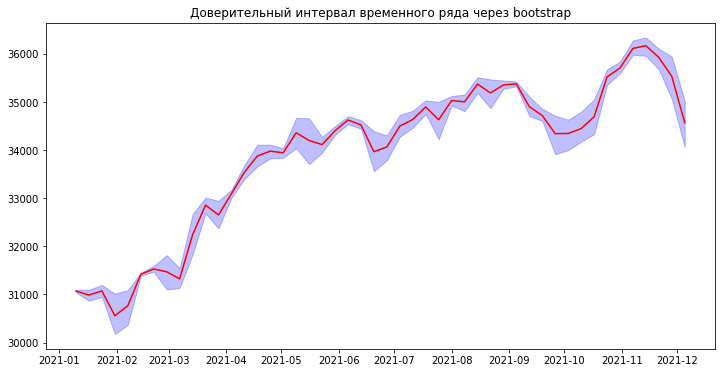

In [23]:
plot_ci(df_dj_2021_ci, 'Dow Jones Industrial Average',
        title='Доверительный интервал временного ряда через bootstrap'
        )

Оформим алгоритм построения доверительного интервала в виде функции

In [24]:
def bootstrap_df(df, n_boot=1000, sample_size=5, ci=95):
  '''
  Вспомогательная функция для создания датафрейма с границами доверительного интервала
  df - pandas DataFrame c временным рядом и доверительным интервалом. Индекс - дневная гранулярность.
  Столбец со значениями временного ряда должен называться 'Dow Jones Industrial Average'.
  n_boot - количество получаемых средних bootstrap-а из исходной выборки.
  sample_size - количество усредняемых значений исходной выборки.
  ci - уровень значимости доверительного интервала.
  '''
  df.loc[:,'week_no'] = df.index.isocalendar().week
  grouped_df = df.groupby('week_no')['Dow Jones Industrial Average'].apply(list)
  grouped_df = pd.DataFrame(grouped_df)
  grouped_df['bootstrap'] = grouped_df['Dow Jones Industrial Average'].apply(make_bootstrap, n_boot=n_boot, sample_size=sample_size)
  grouped_df['bootstrap_mean'] = grouped_df['bootstrap'].apply(np.mean)
  grouped_df['bootstrap_std'] = grouped_df['bootstrap'].apply(np.std)
  grouped_df['norm'] = grouped_df.apply(make_norm, axis='columns')
  df = df.merge(grouped_df[['norm']], how='left', left_on='week_no', right_index=True)

  df['ci_upper'] = df['norm'].apply(np.percentile, q=(100+ci)/2)
  df['ci_lower'] = df['norm'].apply(np.percentile, q=(100-ci)/2)
  
  return df

In [25]:
def plot_bootstrap_df(df, n_boot=1000, sample_size=5, ci=95, resample=True):
  '''
  Вспомогательная функция для построения графика временного ряда с доверительным интервалом
  df - pandas DataFrame c временным рядом и доверительным интервалом. Индекс - дневная гранулярность.
  Столбец со значениями временного ряда должен называться 'Dow Jones Industrial Average'.
  n_boot - количество получаемых средних bootstrap-а из исходной выборки.
  sample_size - количество усредняемых значений исходной выборки.
  ci - уровень значимости доверительного интервала.
  resample - определяет, нужно ли сглаживать данные с дневных на недельные.
  '''
  df = bootstrap_df(df, n_boot=n_boot, sample_size=sample_size, ci=ci)
  plot_ci(df, 'Dow Jones Industrial Average', resample=resample,
          title=f'Доверительный интервал временного ряда через bootstrap (с параметрами: n_boot={n_boot}, sample_size={sample_size}'
        )

# Постоянный доверительный интервал по всему ряду

Посчитаем стандартное отклонение по всему временному ряду и границы доверительного интервала в 2 сигмы.

In [26]:
df_dj_2021 = df_dj_2021[['Dow Jones Industrial Average']]
ts_std = df_dj_2021['Dow Jones Industrial Average'].std()
df_dj_2021.loc[:,'ci_upper'] = df_dj_2021.loc[:,'Dow Jones Industrial Average'] + 2 * ts_std
df_dj_2021.loc[:,'ci_lower'] = df_dj_2021.loc[:,'Dow Jones Industrial Average'] - 2 * ts_std
print('Стандартное отклонение', round(ts_std))

Стандартное отклонение 1556


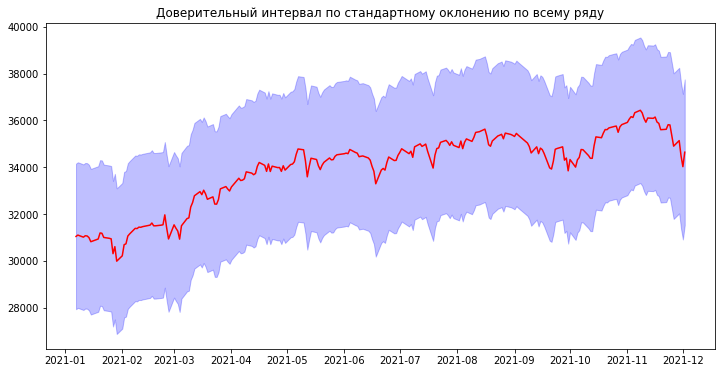

In [27]:
plot_ci(df_dj_2021, 
        'Dow Jones Industrial Average', 
        title='Доверительный интервал по стандартному оклонению по всему ряду',
        resample=False
        )

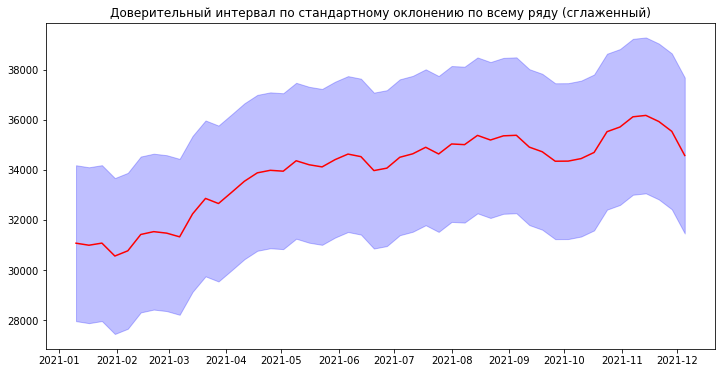

In [28]:
plot_ci(df_dj_2021, 
        'Dow Jones Industrial Average', 
        title='Доверительный интервал по стандартному оклонению по всему ряду (сглаженный)'
        )

# Seaborn

In [29]:
df_dj_2021 = df_dj_2021[['Dow Jones Industrial Average']]
df_dj_2021['Dow Jones Industrial Average']

Date
2021-01-07    31041.13
2021-01-08    31097.97
2021-01-11    31008.69
2021-01-12    31068.69
2021-01-13    31060.47
                ...   
2021-11-26    34899.34
2021-11-29    35135.94
2021-11-30    34483.72
2021-12-01    34022.04
2021-12-02    34639.79
Name: Dow Jones Industrial Average, Length: 229, dtype: float64

In [30]:
df_dj_2021['week'] = df_dj_2021.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


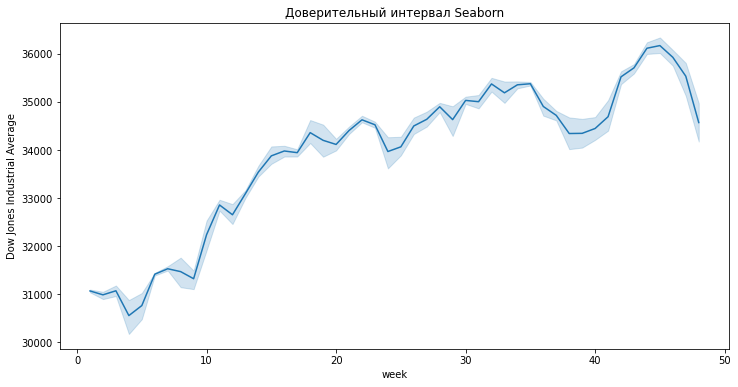

In [31]:
plt.figure(figsize=(12, 6))
plt.title('Доверительный интервал Seaborn')
sns.lineplot(data=df_dj_2021, x='week', y='Dow Jones Industrial Average')
None

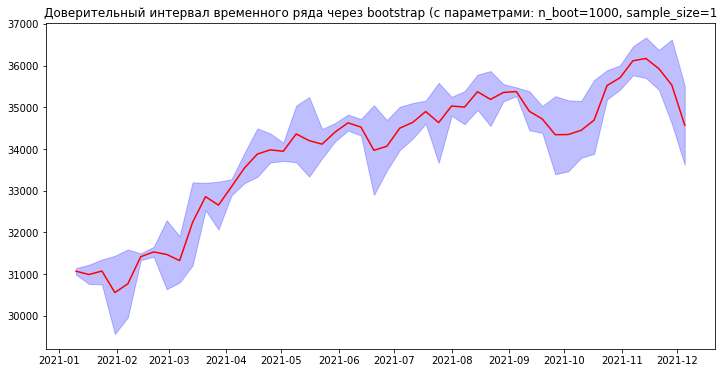

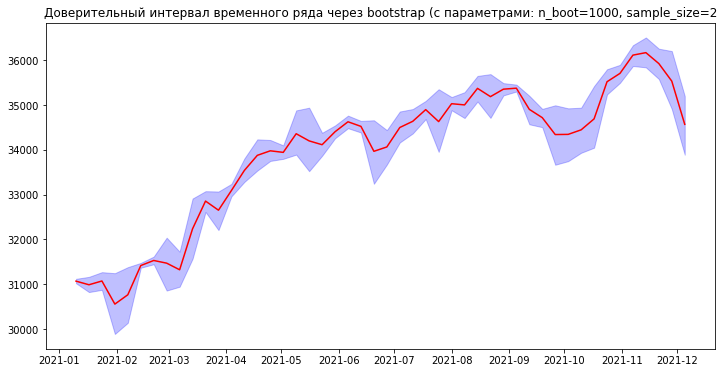

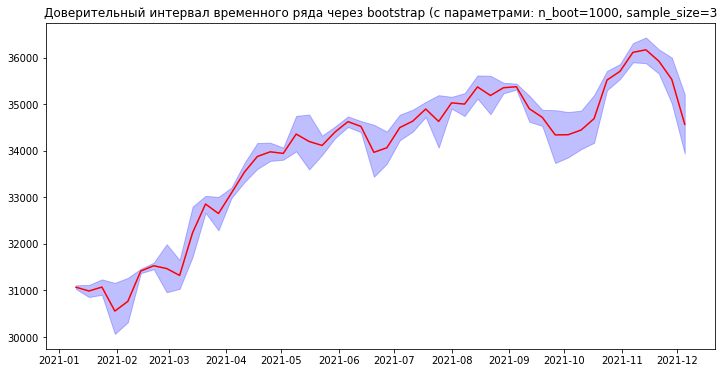

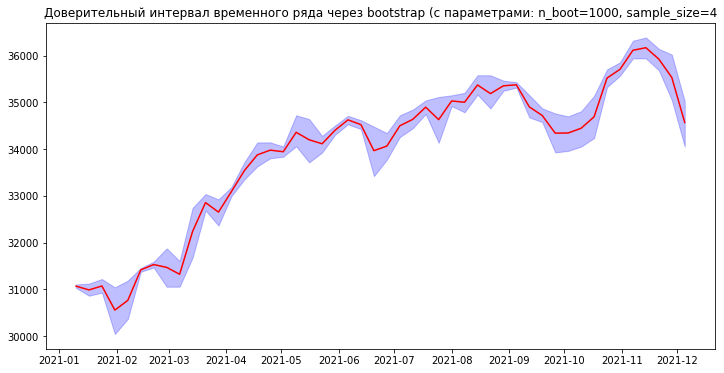

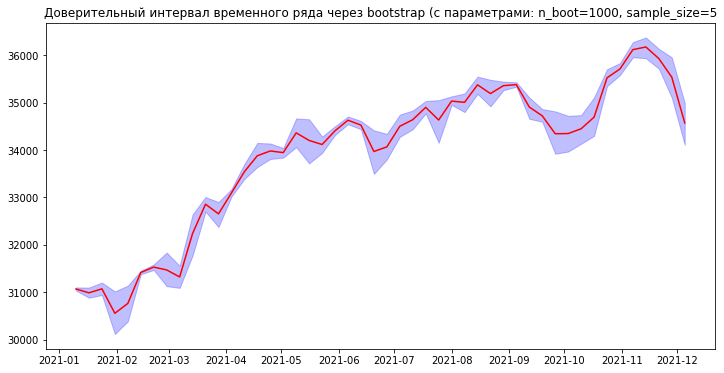

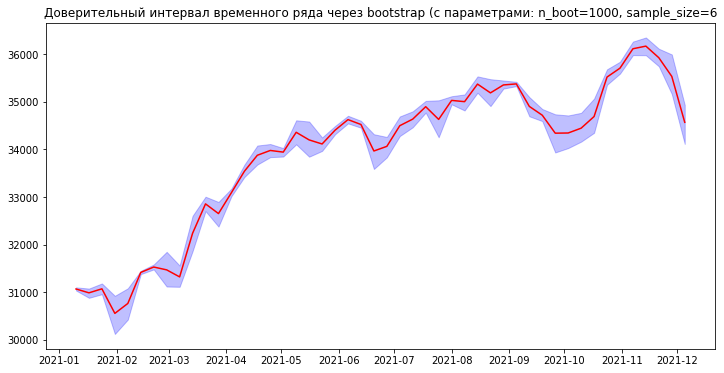

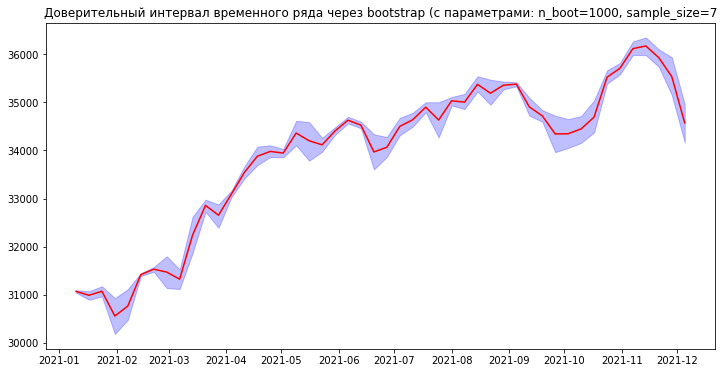

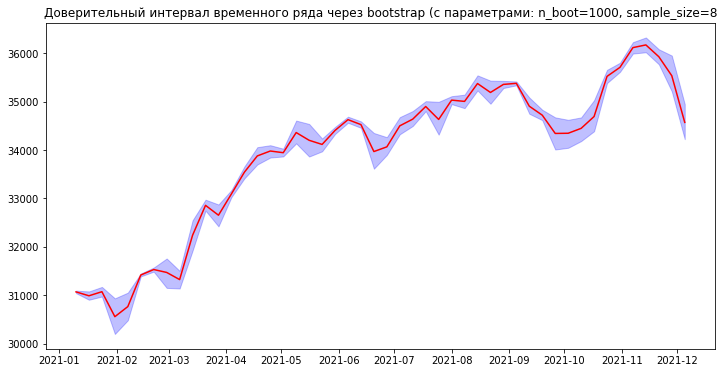

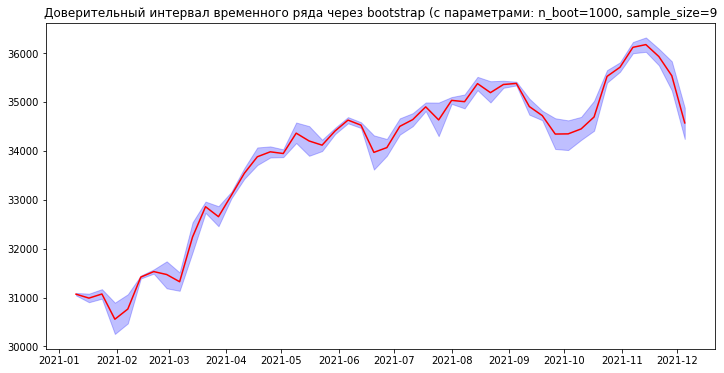

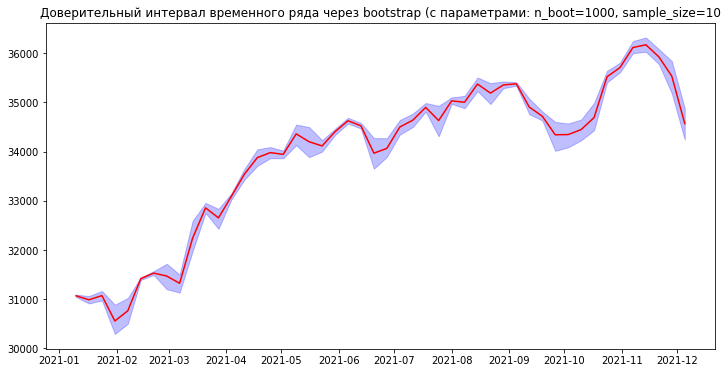

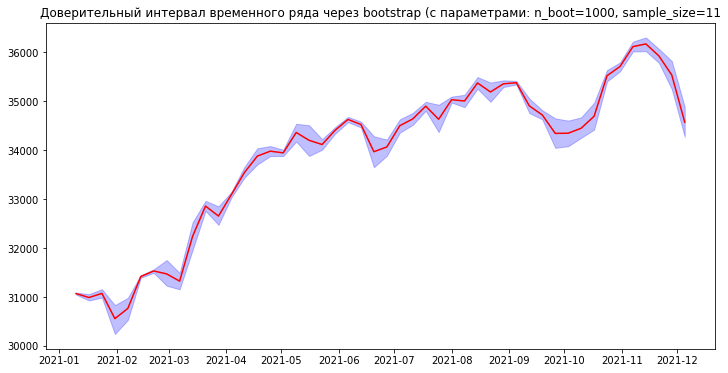

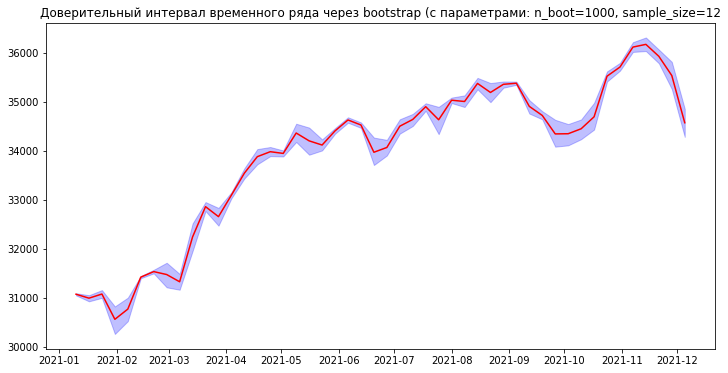

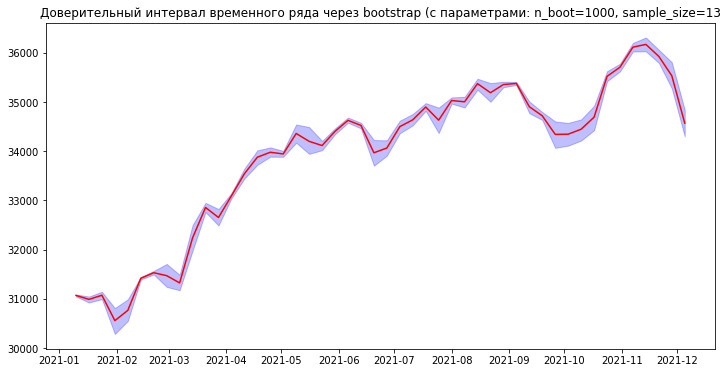

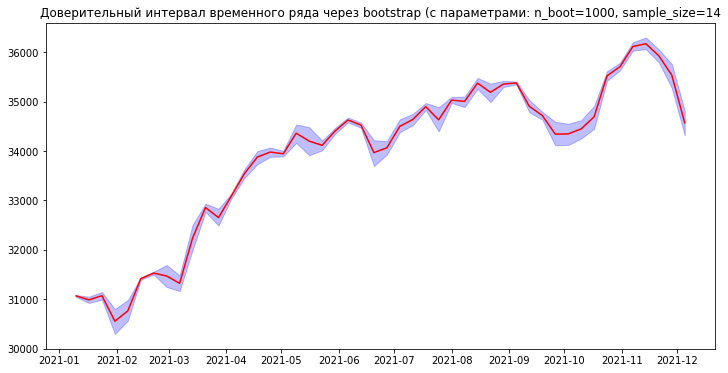

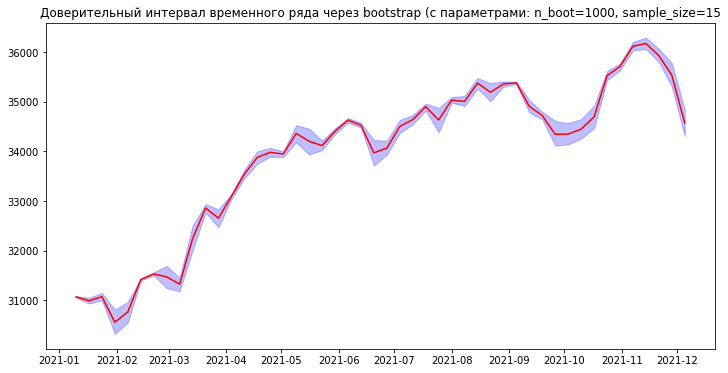

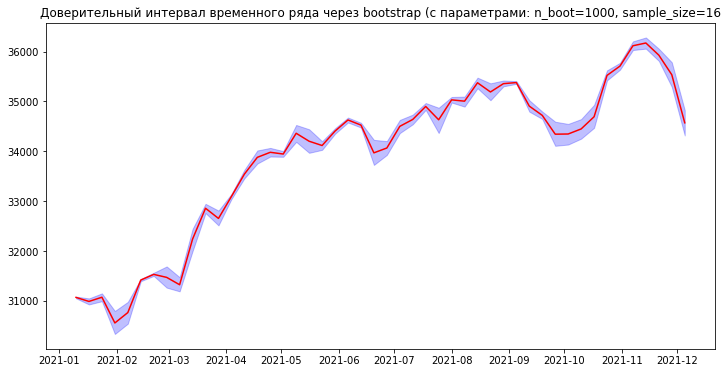

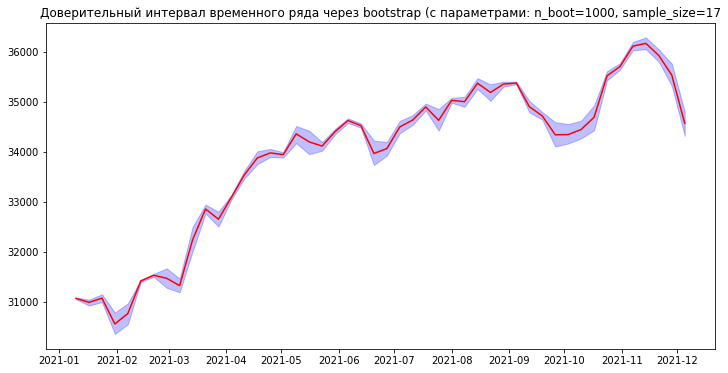

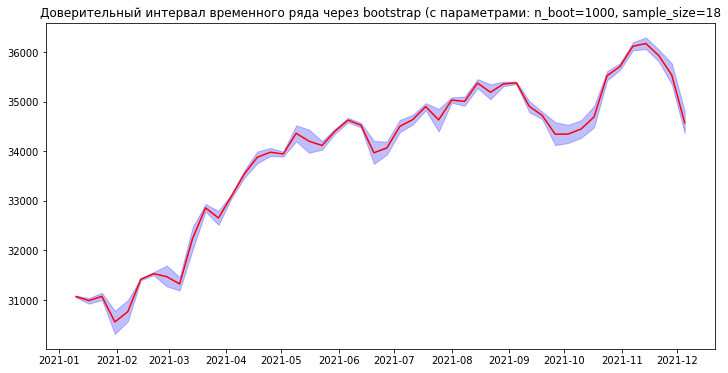

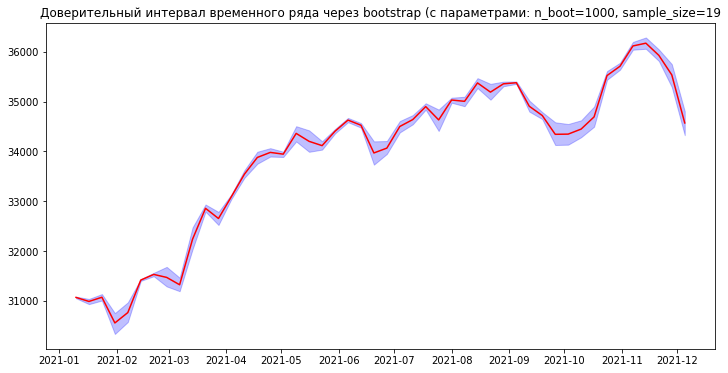

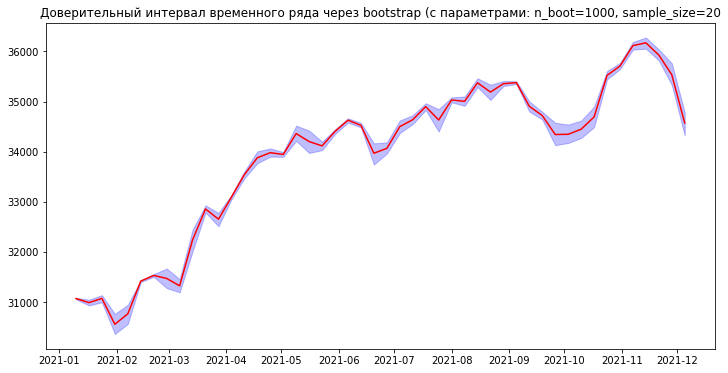

In [32]:
for i in range(1,21):
  plot_bootstrap_df(df_dj_2021[['Dow Jones Industrial Average']], n_boot=1000, sample_size=i, ci=99)

# Plotly

In [33]:
plotly_bootstrap_df = bootstrap_df(df_dj_2021[['Dow Jones Industrial Average']])
plotly_bootstrap_df

,Dow Jones Industrial Average,week_no,norm,ci_upper,ci_lower
Date,,,,,
2021-01-07,31041.13,1,"[31029.327096901205, 31032.79846258555, 31034....",31092.969398,31044.492400
2021-01-08,31097.97,1,"[31029.327096901205, 31032.79846258555, 31034....",31092.969398,31044.492400
2021-01-11,31008.69,2,"[30837.139468976366, 30842.443536672134, 30849...",31061.423824,30908.800065
2021-01-12,31068.69,2,"[30837.139468976366, 30842.443536672134, 30849...",31061.423824,30908.800065
2021-01-13,31060.47,2,"[30837.139468976366, 30842.443536672134, 30849...",31061.423824,30908.800065
...,...,...,...,...,...
2021-11-26,34899.34,47,"[35058.8153070919, 35070.0037352329, 35071.658...",35892.229190,35202.627112
2021-11-29,35135.94,48,"[33992.5157183664, 34055.42294157974, 34057.36...",34925.371314,34197.170581
2021-11-30,34483.72,48,"[33992.5157183664, 34055.42294157974, 34057.36...",34925.371314,34197.170581


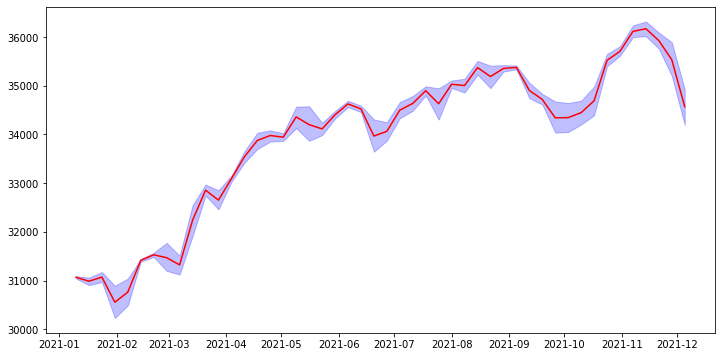

In [34]:
plot_ci(plotly_bootstrap_df, 'Dow Jones Industrial Average')

In [35]:
plotly_bootstrap_df.tail(12)

,Dow Jones Industrial Average,week_no,norm,ci_upper,ci_lower
Date,,,,,
2021-11-16,36142.22,46,"[35663.46785129233, 35668.418367739265, 35671....",36091.533547,35760.574874
2021-11-17,35931.05,46,"[35663.46785129233, 35668.418367739265, 35671....",36091.533547,35760.574874
2021-11-18,35870.95,46,"[35663.46785129233, 35668.418367739265, 35671....",36091.533547,35760.574874
2021-11-19,35601.98,46,"[35663.46785129233, 35668.418367739265, 35671....",36091.533547,35760.574874
2021-11-22,35619.25,47,"[35058.8153070919, 35070.0037352329, 35071.658...",35892.229190,35202.627112
2021-11-23,35813.80,47,"[35058.8153070919, 35070.0037352329, 35071.658...",35892.229190,35202.627112
2021-11-24,35804.38,47,"[35058.8153070919, 35070.0037352329, 35071.658...",35892.229190,35202.627112
2021-11-26,34899.34,47,"[35058.8153070919, 35070.0037352329, 35071.658...",35892.229190,35202.627112
2021-11-29,35135.94,48,"[33992.5157183664, 34055.42294157974, 34057.36...",34925.371314,34197.170581


In [36]:
forecast_list=[]
fact_list = plotly_bootstrap_df.tail(12)['Dow Jones Industrial Average'].values
for i in range(len(fact_list)):
  forecast_list.append(fact_list[i] + 100*(i+1))

forecast_df = pd.DataFrame(forecast_list, columns=['forecast'], index=plotly_bootstrap_df.tail(12).index)
forecast_df

,forecast
Date,
2021-11-16,36242.22
2021-11-17,36131.05
2021-11-18,36170.95
2021-11-19,36001.98
2021-11-22,36119.25
2021-11-23,36413.80
2021-11-24,36504.38
2021-11-26,35699.34
2021-11-29,36035.94


In [37]:
xaxes_min = plotly_bootstrap_df['Dow Jones Industrial Average'].index[-100]
xaxes_max = plotly_bootstrap_df['Dow Jones Industrial Average'].index[-1]
yaxes_min = plotly_bootstrap_df.loc[xaxes_min:xaxes_max,'Dow Jones Industrial Average'].min()*0.999
yaxes_max = plotly_bootstrap_df.loc[xaxes_min:xaxes_max,'Dow Jones Industrial Average'].max()*1.001

fig = go.Figure()
#fig.update_yaxes(range=[33000, 36500])
fig.update_yaxes(range=[yaxes_min, yaxes_max])
fig.update_xaxes(range=[xaxes_min,xaxes_max])
fig.add_trace(go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean(), 
                         name='Факт',
                         line_color='red', visible='legendonly')) # другие варианты visible=True, visible=False
fig.add_trace(go.Scatter(x=forecast_df.resample('W').mean().index, 
                         y=forecast_df['forecast'].resample('W').mean(), 
                         name='Прогноз',
                         line_color='green', visible=True))
fig.add_traces([go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['ci_upper'].resample('W').mean(), 
                         name='ci_upper', 
                         line_color='rgba(0,0,255,0.2)',
                         line_width=0),
                go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['ci_lower'].resample('W').mean(), 
                         name='ci_lower', 
                         fill='tonexty', 
                         line_color='rgba(0,0,255,0.2)',
                         line_width=0)
                         ]
                         )

fig.show()

# Доверительный интервал прогноза

http://www.e-biblio.ru/book/bib/10_statistika/statistich_metody_prognoz_v_econom/posob/248.2.4.html

$y_L = t_a * S_y * K$

$t_a - $ значение t-статистики Стьюдента

$S^2_y - $ дисперсия отклонений фактических наблюдений от расчетных

***K*** - выражение с корнем

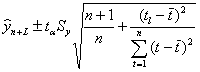

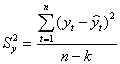

**K**

In [38]:
n = len(plotly_bootstrap_df['Dow Jones Industrial Average'])
L = len(forecast_df)
tl = n + L
t_ = int((n + 1) / 2) # порядковый номер уровня, стоящего в середине ряда, t- порядковый номер уровней ряда, t=1,2, ... , n
print('n =', n)
print('L =', L)
print('tl =', tl)
print('t_ =', t_)

n = 229
L = 12
tl = 241
t_ = 115


In [39]:
t_var = 0 # значение суммы в знаменателе
for t in range(1,n+1):
  t_var += (t - t_)**2
print('t_var =', t_var)

t_var = 1000730


In [40]:
K = ((n+1)/n + (tl-t_)**2/t_var)
K

1.020231231201223

$S_y$

In [41]:
k = 1 # число оцениваемых параметров выравнивающей кривой
y_true = plotly_bootstrap_df['Dow Jones Industrial Average'].tail(12).values
y_pred = forecast_df['forecast'].values
Sy = (((y_true - y_pred)**2).sum() / (n-k))**(1/2)
Sy

168.8454083764926

$t_a$

In [42]:
N = L
SD = np.sqrt((y_true.var() + y_pred.var()) / 2)
tval = abs((y_true.mean() - y_pred.mean()) / (SD * np.sqrt(2 / N)))
tval

3.0018200515378597

In [43]:
ci = tval * Sy * K
ci

517.0976011629932

Не понятно, как учитывать уровень значимости

In [44]:
forecast_df['std'] = forecast_df['forecast'].std()
forecast_df['mean'] = forecast_df['forecast'].mean()
forecast_df

,forecast,std,mean
Date,,,
2021-11-16,36242.22,392.545718,35980.371667
2021-11-17,36131.05,392.545718,35980.371667
2021-11-18,36170.95,392.545718,35980.371667
2021-11-19,36001.98,392.545718,35980.371667
2021-11-22,36119.25,392.545718,35980.371667
2021-11-23,36413.80,392.545718,35980.371667
2021-11-24,36504.38,392.545718,35980.371667
2021-11-26,35699.34,392.545718,35980.371667
2021-11-29,36035.94,392.545718,35980.371667


Для учета уровня значимости можно построить нормальное распределение со следующими параметрами: loc - среднее значение прогноза, scale - стандартное отклонение фактических значений от прогноза. После этого необходимо вязть процентили, соответствующие требуемому уровню значимости.

In [45]:
sample_mean_std = sps.norm(loc=forecast_df['forecast'].mean(), scale=Sy).rvs(size=200)
print('Первые 10 значений выборки:\n', sample_mean_std[:10])
print('Выборочное среденее: %.3f' % sample_mean_std.mean())
print('Выборочная дисперсия: %.3f' % sample_mean_std.var())
print('Выборочное стандартное отклонение: %.3f' % sample_mean_std.std())
print(f'Процентиль 2,5%: {np.percentile(sample_mean_std, 2.5):.3f}')
print(f'Процентиль 97,5%: {np.percentile(sample_mean_std, 97.5):.3f}')

Первые 10 значений выборки:
 [36053.23653855 35811.15193963 35820.55279805 35935.58610148
 35934.10441591 36379.83814704 35783.70900515 35925.05045254
 35718.45578387 35996.50418046]
Выборочное среденее: 35985.653
Выборочная дисперсия: 29293.602
Выборочное стандартное отклонение: 171.154
Процентиль 2,5%: 35667.781
Процентиль 97,5%: 36344.610


In [46]:
sample_median_std = sps.norm(loc=forecast_df['forecast'].median(), scale=Sy).rvs(size=200)
print('Первые 10 значений выборки:\n', sample_median_std[:10])
print('Выборочное среденее: %.3f' % sample_median_std.mean())
print('Выборочная дисперсия: %.3f' % sample_median_std.var())
print('Выборочное стандартное отклонение: %.3f' % sample_median_std.std())

Первые 10 значений выборки:
 [36238.20709053 36251.79172682 35920.01414032 36072.59042738
 36116.53843584 35994.97840606 36101.01205117 36104.52329803
 35943.54188677 35877.00584461]
Выборочное среденее: 36047.360
Выборочная дисперсия: 27161.879
Выборочное стандартное отклонение: 164.809


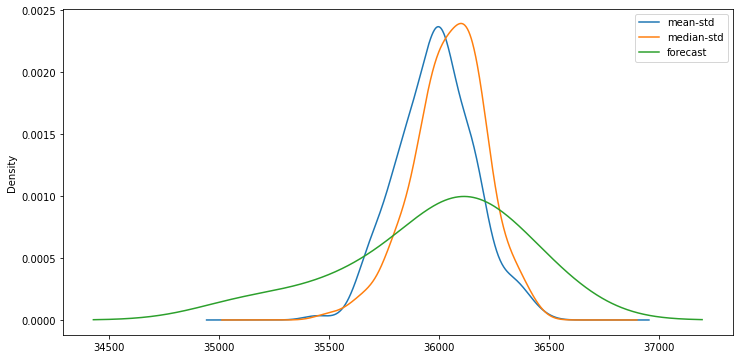

In [47]:
ax = pd.Series(sample_mean_std).plot(kind='kde', figsize=(12,6), label='mean-std', legend=True)
pd.Series(sample_median_std).plot(ax=ax, kind='kde', figsize=(12,6), label='median-std', legend=True)
forecast_df['forecast'].plot(ax=ax, kind='kde', label='forecast', legend=True)
None

In [48]:
forecast_df.loc[:,'ci_lower_norm'] = np.percentile(sample_mean_std, 2.5)
forecast_df.loc[:,'ci_upper_norm'] = np.percentile(sample_mean_std, 97.5)
forecast_df

,forecast,std,mean,ci_lower_norm,ci_upper_norm
Date,,,,,
2021-11-16,36242.22,392.545718,35980.371667,35667.781108,36344.609715
2021-11-17,36131.05,392.545718,35980.371667,35667.781108,36344.609715
2021-11-18,36170.95,392.545718,35980.371667,35667.781108,36344.609715
2021-11-19,36001.98,392.545718,35980.371667,35667.781108,36344.609715
2021-11-22,36119.25,392.545718,35980.371667,35667.781108,36344.609715
2021-11-23,36413.80,392.545718,35980.371667,35667.781108,36344.609715
2021-11-24,36504.38,392.545718,35980.371667,35667.781108,36344.609715
2021-11-26,35699.34,392.545718,35980.371667,35667.781108,36344.609715
2021-11-29,36035.94,392.545718,35980.371667,35667.781108,36344.609715


In [49]:
xaxes_min = plotly_bootstrap_df['Dow Jones Industrial Average'].index[-100]
xaxes_max = plotly_bootstrap_df['Dow Jones Industrial Average'].index[-1]
yaxes_min = plotly_bootstrap_df.loc[xaxes_min:xaxes_max,'Dow Jones Industrial Average'].min()*0.999
yaxes_max = plotly_bootstrap_df.loc[xaxes_min:xaxes_max,'Dow Jones Industrial Average'].max()*1.001

fig = go.Figure()
#fig.update_yaxes(range=[33000, 36500])
fig.update_yaxes(range=[yaxes_min, yaxes_max])
fig.update_xaxes(range=[xaxes_min,xaxes_max])
fig.add_trace(go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean(), 
                         name='Факт',
                         line_color='red', visible=True)) # другие варианты visible='legendonly', visible=False
fig.add_trace(go.Scatter(x=forecast_df.resample('W').mean().index, 
                         y=forecast_df['forecast'], 
                         name='Прогноз',
                         line_color='green', visible=True))
fig.add_traces([go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['ci_upper'].resample('W').mean(), 
                         name='ci_upper', 
                         line_color='rgba(0,0,255,0.2)',
                         line_width=0),
                go.Scatter(x=plotly_bootstrap_df['Dow Jones Industrial Average'].resample('W').mean().index, 
                         y=plotly_bootstrap_df['ci_lower'].resample('W').mean(), 
                         name='Доверительный интервал временного ряда', 
                         fill='tonexty', 
                         line_color='rgba(0,0,255,0.2)',
                         line_width=0)
                         ]
                         )

fig.add_traces([go.Scatter(x=forecast_df.resample('W').mean().index, 
                         y=forecast_df['ci_upper_norm'].resample('W').mean(), 
                         name='ci_forecast_upper_norm', 
                         line_color='rgba(255,0,0,0.2)',
                         line_width=0),
                go.Scatter(x=forecast_df.resample('W').mean().index, 
                         y=forecast_df['ci_lower_norm'].resample('W').mean(), 
                         name='Доверительный интервал прогноза (norm)', 
                         fill='tonexty', 
                         line_color='rgba(255,0,0,0.2)',
                         line_width=0)
                         ]
                         )
fig.show()

# Другие источники
https://stackoverflow.com/questions/58399030/make-a-seaborn-lineplot-with-standard-deviation-confidence-interval-specified-f